In [2]:
import pandas as pd 
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("HUJ MoveEcol Lab Israel_ Foraging search efficiency in white backed & lappet-faced vultures, Namibia (data from Spiegel et al. 2013).csv")
animal_name = "vulture species"

In [4]:
df.tail(5)

,event-id,visible,timestamp,location-long,location-lat,comments,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
346645,162892910,True,2008-04-25 14:34:00.000,15.659743,-19.064094,690.0,16.64,276.56,1815.0,gps,Gyps africanus,99,6,HUJ MoveEcol Lab Israel: Foraging search effic...
346646,162892911,True,2008-04-25 14:36:01.000,15.641094,-19.052972,422.3,20.91,305.40,1547.3,gps,Gyps africanus,99,6,HUJ MoveEcol Lab Israel: Foraging search effic...
346647,162892912,True,2008-04-25 14:37:59.000,15.637671,-19.051551,560.1,4.02,357.17,1685.1,gps,Gyps africanus,99,6,HUJ MoveEcol Lab Israel: Foraging search effic...
346648,162892913,True,2008-04-25 14:40:01.000,15.631971,-19.056157,671.1,3.33,71.43,1796.1,gps,Gyps africanus,99,6,HUJ MoveEcol Lab Israel: Foraging search effic...
346649,162892914,True,2008-04-25 14:42:00.000,15.636117,-19.055717,836.3,18.38,41.94,1960.3,gps,Gyps africanus,99,6,HUJ MoveEcol Lab Israel: Foraging search effic...


In [5]:
df['individual-taxon-canonical-name'].iloc[100000]

'Torgos tracheliotus'

In [6]:
df['individual-taxon-canonical-name']

0         Gyps africanus
1         Gyps africanus
2         Gyps africanus
3         Gyps africanus
4         Gyps africanus
               ...      
346645    Gyps africanus
346646    Gyps africanus
346647    Gyps africanus
346648    Gyps africanus
346649    Gyps africanus
Name: individual-taxon-canonical-name, Length: 346650, dtype: object

In [7]:
df = df[df['individual-taxon-canonical-name'] == "Gyps africanus"]

In [8]:
individuals = [j for i, j in df.groupby("tag-local-identifier")]
len(individuals)

12

In [9]:
def todiff(dat, ref):
    dat = datetime.datetime.fromisoformat(dat)
    dat = dat.timestamp()
    ref = datetime.datetime.fromisoformat(ref)
    ref = ref.timestamp()
    dat = dat - ref
    return dat/(3600)

In [10]:
for individual in individuals:
    initial = individual.timestamp.iloc[0]
    individual["timediff"] = individual["timestamp"].transform(lambda x : todiff(x, initial))

In [11]:
def project(lon, lat):
    lon = lon.transform(math.radians)
    lat = lat.transform(math.radians)
    ref_lon = lon.iloc[0]
    ref_lat = lat.iloc[0]
    lon = lon - ref_lon
    lat = lat - ref_lat
    r = 6373.0 #kilometer
    y = lat * r
    x = np.cos(lat) * lon * r
    return x, y

In [12]:
for individual in individuals:
    individual["X"], individual["Y"] = project(individual["location-long"], individual["location-lat"])

In [13]:
individuals.sort(key=len, reverse=True)

In [14]:
arr = individuals[0][["timediff", "X", "Y"]]

In [15]:
def prepare(ind):
    arr = ind[["timediff", "X", "Y"]]
    ##
    #time = ind.timediff.to_numpy()
    #crit_points=
    ##
    diff = arr.timediff.iloc[-1]-arr.timediff.iloc[0]
    t = np.arange(0, diff, 1/30)
    x = np.interp(t, arr.timediff, arr.X)
    y = np.interp(t, arr.timediff, arr.Y)
    #r_squ = x*x + y*y
    #plt.plot(t, r_squ)
    return t, x, y

In [16]:
def squ_displ(x, y):
    squ_disp = []
    for dt in range((int)(len(x)/2)):
        shiftx = np.roll(x, -dt)[:-dt]
        shifty = np.roll(y, -dt)[:-dt]
        r_squ = (shiftx-x[:-dt])**2+(shifty-y[:-dt])**2
        dx = shiftx - x[:-dt]
        dy = shifty - y[:-dt]
        squ_disp.append(np.mean(r_squ)-(np.mean(dx)**2+np.mean(dy)**2))
    return np.array(squ_disp)

In [17]:
h = [int(1.1**i) for i in range(91) if int(1.1**i)!=int(1.1**(i-1))]

In [18]:
ts = individuals[1].iloc[:]
ts = ts.timediff.to_numpy()
#plt.plot(ts[7510:7530], ".")
ds = np.roll(ts, -1)[:-1] - ts[:-1]
print(np.median(ds), np.quantile(ds, .998), np.max(ds))
#plt.hist(ds, bins=100)
print(np.where(ds > 1))
sleep = np.where(ds > 1)
nosleep = np.where(ds < 1)
print(len(np.where(ds > 12)[0])*12)
print(ts[-1]-ts[0])
u = np.where(ds > 12)[0]
ul = np.roll(u, -1)[:-1] - u[:-1]
np.where(ul == max(ul))
u[61]

0.06638888888869587 12.065833333333329 12.06666666666672
(array([   38,   217,   396,   576,   760,  1002,  1240,  1435,  1692,
        1929,  2176,  2391,  2633,  2885,  3109,  3333,  3523,  3762,
        3973,  4224,  4493,  4747,  4958,  5136,  5368,  5620,  5840,
        6049,  6277,  6516,  6773,  6953,  7169,  7347,  7518,  7723,
        7947,  8175,  8374,  8618,  8832,  9044,  9298,  9515,  9689,
        9916, 10160, 10360, 10540, 10769, 11021, 11228, 11407, 11588,
       11775, 12010, 12271, 12450, 12667, 12908, 13168, 13429, 13609,
       13789, 13966, 14143, 14353, 14624, 14885, 15136, 15348, 15594,
       15838, 16018, 16198, 16378, 16562, 16742, 16940, 17198, 17430,
       17641, 17916, 18167, 18407, 18638, 18818, 18998, 19233, 19443,
       19672, 19917, 20176, 20417, 20594, 20795, 21023, 21240, 21479,
       21658, 21836, 22097, 22334, 22561, 22776, 23002, 23212, 23427,
       23697, 23967, 24160, 24401, 24629, 24897, 25157, 25396, 25586,
       25774, 26004, 26239, 2641

13609

In [19]:
ts = individuals[1].iloc[:]
xs = ts.X.to_numpy()
ts = ts.timediff.to_numpy()
plt.plot(ts[200:230], X[200:230])

NameError: name 'X' is not defined

In [23]:
arr = individuals[1]
diff = arr.timediff.iloc[-1]-arr.timediff.iloc[0]
diff / 24

161.819375

[ 0.         -0.11300572 -0.22044919 -0.20055173 -0.19424901 -0.1931492
 -0.34293372 -0.48509775 -0.48247236 -0.4800162  -0.48246791 -0.48988627
 -0.61153755 -0.73092804 -0.78246705 -0.7813649  -0.78026622 -0.77926796
 -0.7783509  -0.77897674 -0.77962262 -0.78072935 -0.7817969  -0.78196305
 -0.78233904 -0.78880061 -0.79497534 -0.79455267 -0.79410682 -0.793128
 -0.79219411 -0.7922938  -0.79157866 -0.76723335 -0.73875423 -0.63530586
 -0.6354734  -0.6356065  -0.6349475  -0.63439677 -0.63590322 -0.63683321
 -0.62450469 -0.61260395 -0.61310869 -0.61348202 -0.61135854 -0.60507018
 -0.47800011 -0.35636644] [ 0.         -0.15251456 -0.31380346 -0.66219232 -0.67225562 -0.68887393
 -0.89558757 -1.09205018 -1.09374345 -1.09569749 -1.10521392 -1.12389776
 -1.35343183 -1.58116152 -1.74930028 -1.75036366 -1.75140411 -1.75177986
 -1.75215067 -1.75242759 -1.75268602 -1.75251918 -1.7563721  -1.85267959
 -1.94582766 -1.9473523  -1.94880113 -1.94850638 -1.9482422  -1.94868156
 -1.94902877 -1.94725648 -1.

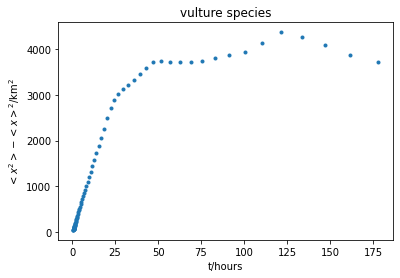

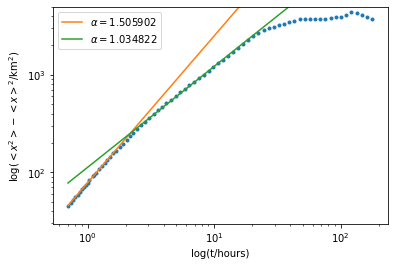

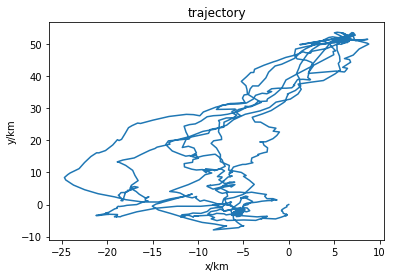

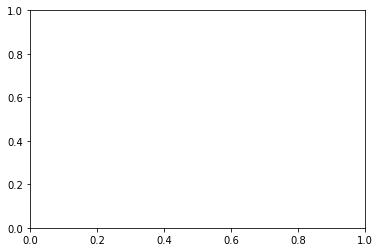

In [21]:
f1 = plt.figure()
a1 = f1.add_subplot(1, 1, 1)
a1.set_xlabel("t/hours")
a1.set_title(animal_name)
a1.set_ylabel(r"$<x^2>-<x>^2$/km$^2$")
f2 = plt.figure()
a2 = f2.add_subplot(1, 1, 1)
a2.set_xlabel("log(t/hours)")
#a2.set_title(animal_name)
a2.set_ylabel(r"log($<x^2>-<x>^2$/km$^2$)")
f3 = plt.figure()
a3 = f3.add_subplot(1, 1, 1)
a3.set_xlabel("x/km")
a3.set_title("trajectory")
a3.set_ylabel("y/km")
f4 = plt.figure()
a4 = f4.add_subplot(1, 1, 1)
for individual in individuals[1:2]:
#individual = individuals[1]
    t, x, y = prepare(individual)
    #print(x)
    #a4.plot(t[30:50], x[30:50]**2+y[30:50]**2, ".")
    squ_disp = squ_displ(x, y)
    t = t[20:len(squ_disp)] 
    squ_disp = squ_disp[20:]
    #print(squ_disp)
    squ_disp = squ_disp[h]
    t = t[h]
    a1.plot(t, squ_disp, ".")
    a2.loglog(t, squ_disp, ".")
    a3.plot(x[:30*24*10], y[:30*24*10])
    print(x[:50], y[:50])
    b, a = np.polyfit(np.log(t[1:20]), np.log(squ_disp[1:20]), 1)
    print(b)
    a2.plot(t, np.exp(a)*t**b, label=r"$\alpha=$%f" % b)
    b, a = np.polyfit(np.log(t[25:50]), np.log(squ_disp[25:50]), 1)
    print(b)
    a2.plot(t, np.exp(a)*t**b, label=r"$\alpha=$%f" % b)
    a2.set_ylim(0, 5*10**3)
    a2.legend()
    #a4.hist(np.abs(np.roll(x, -1)[:-1]-x[:-1]), bins=100, cumulative=-1, log=True, histtype="step")
f1.savefig(animal_name+".pdf")
f2.savefig(animal_name+"_log.pdf")
f3.savefig(animal_name+"_trajectory.pdf")

0.09699025587277042


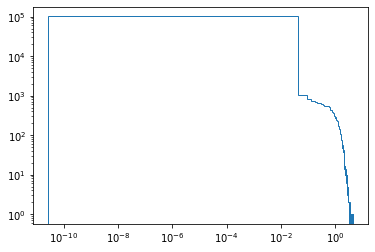

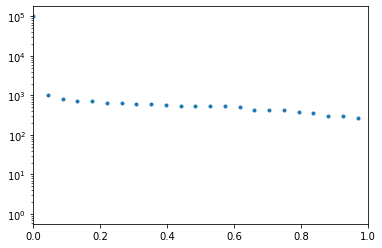

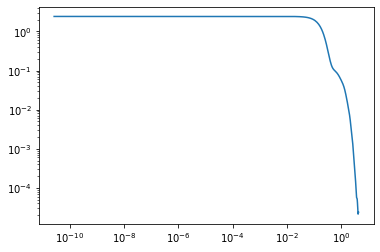

In [117]:
t, x, y = prepare(individuals[1])
x = np.abs(np.roll(x, -1)[:-1]-x[:-1])
#x = np.roll(x, -1)[:-1]-x[:-1]
y = np.abs(np.roll(y, -1)[:-1]-y[:-1])
#y = np.roll(y, -1)[:-1]-y[:-1]
#x = np.sqrt(x*x+y*y)
#x = x[x>2*10**(0)]
plt.xscale("log")
#x = np.log(x)
n, b, p = plt.hist(x, bins=100, cumulative=0, log=True, density=False, histtype="step")
plt.figure()
plt.plot(b[:len(n)], n[:], ".")
plt.yscale("log")
plt.xlim(0, 1)
plt.figure()
plt.xscale("log")
plt.yscale("log")
print(len(x)**(-1./(1+4)))

rn = np.arange(min(x), max(x), 0.01)
from scipy.stats import expon
from scipy.stats import gaussian_kde
kde = gaussian_kde(x, bw_method=0.5)
plt.plot(rn, kde.evaluate(rn))
p, q = expon.fit(x)
#plt.plot(rn, 1-expon.cdf(rn, p, q))
#cauchy.pdf(b[1:len(n)], p, q)
#plt.ylim(10**(-1), 2)

In [348]:
f1 = plt.figure()
a1 = f1.add_subplot(1, 1, 1)
a1.set_xlabel("t/hours")
a1.set_title(animal_name)
a1.set_ylabel(r"$<x^2>-<x>^2$/km$^2$")
f2 = plt.figure()
a2 = f2.add_subplot(1, 1, 1)
a2.set_xlabel("t/hours")
#a2.set_title(animal_name)
a2.set_ylabel(r"$<x^2>-<x>^2$/km$^2$")
f3 = plt.figure()
a3 = f3.add_subplot(1, 1, 1)
a3.set_xlabel("x/km")
a3.set_title("trajectory")
a3.set_ylabel("y/km")
for individual in individuals[:1]:
#individual = individuals[1]
    t, x, y = prepare(individual)
    squ_disp = squ_displ(x, y)
    squ_disp = squ_disp[20:]
    t = t[20:len(squ_disp)] 
    squ_disp = squ_disp[h]
    t = t[h]
    a1.plot(t, squ_disp, ".")
    a2.loglog(t, squ_disp, ".")
    a3.plot(x[:30*24*10], y[:30*24*10])
    b, a = np.polyfit(np.log(t[1:20]), np.log(squ_disp[1:20]), 1)
    print(b)
    a2.plot(t, np.exp(a)*t**b)
    b, a = np.polyfit(np.log(t[20:50]), np.log(squ_disp[20:50]), 1)
    print(b)
    a2.plot(t, np.exp(a)*t**b)
    #a2.set_ylim(0, 5*10**3)
f1.savefig(animal_name+"2.pdf")
f2.savefig(animal_name+"_log2.pdf")
f3.savefig(animal_name+"_trajectory2.pdf")

KeyboardInterrupt: 

1.4813454704879583


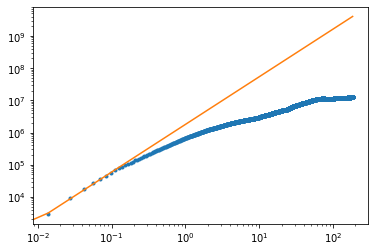

In [99]:
ls = []
for individual in individuals[:5]:
    t, x, y = prepare(individual)
    squ_disp = squ_displ(x, y)
    ls.append(squ_disp)
m = np.min([len(i) for i in ls])
#print(m/24)
X = np.zeros(m)
for element in ls:
    element = element[:m]
    X += element
X = X/m
t = t[:m] / 24
plt.xscale("log")
plt.yscale("log")
plt.plot(t, X, ".")
b, a = np.polyfit(np.log(t[1:10]), np.log(X[1:10]), 1)
print(b)
plt.plot(t, np.exp(a)*t**b)
#print(X)
plt.savefig(animal_name+"_avg.pdf")